In [1]:
#data loading
import numpy as np
import pandas as pd
df=pd.read_csv('heart_cleveland_upload.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [2]:
df.shape

(297, 14)

In [3]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [4]:
df.dtypes

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

In [5]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [6]:
#separating x and y
x=df.iloc[:,0:-1]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0


In [7]:
y=df.iloc[:,-1]
y

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64

In [8]:
x.ndim

2

In [9]:
y.ndim

1

In [10]:
#splitting training testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)


In [11]:
print(x_train.shape)

(207, 13)


In [12]:
print(x_test.shape)

(90, 13)


In [13]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
167,66,0,3,178,228,1,0,165,1,1.0,1,2,2
211,59,1,3,140,177,0,0,162,1,0.0,0,1,2
63,41,1,1,135,203,0,0,132,0,0.0,1,0,1
154,37,0,2,120,215,0,0,170,0,0.0,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,52,1,0,118,186,0,2,190,0,0.0,1,0,1
10,59,1,0,170,288,0,2,159,0,0.2,1,0,2
228,57,1,3,110,335,0,0,143,1,3.0,1,1,2
184,63,1,3,140,187,0,2,144,1,4.0,0,2,2


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
import joblib
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(x_train, y_train)



RandomForestClassifier(n_estimators=200, random_state=42)

In [15]:
# 7. eval
y_pred = rf.predict(x_test)
y_proba = rf.predict_proba(x_test)[:,1]
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))



              precision    recall  f1-score   support

           0       0.84      0.85      0.85        48
           1       0.83      0.81      0.82        42

    accuracy                           0.83        90
   macro avg       0.83      0.83      0.83        90
weighted avg       0.83      0.83      0.83        90

AUC: 0.9084821428571429


In [16]:
# save model
joblib.dump(rf, "rf_heart_model.joblib")

['rf_heart_model.joblib']

In [17]:
import shap
import pandas as pd
 
shap.initjs()

# --- Create TreeExplainer for your RandomForest model ---
explainer = shap.TreeExplainer(rf)

start_index=1
end_index=2
shap_values=explainer.shap_values(x_test)
# x_test[start_index:end_index]

for i in range(len(shap_values)):
    print(shap_values[i].shape)
shap_values

c:\Users\neham\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)
(13, 2)


array([[[-0.02164624,  0.02164624],
        [ 0.05750303, -0.05750303],
        [-0.07295813,  0.07295813],
        ...,
        [-0.04007503,  0.04007503],
        [-0.12632533,  0.12632533],
        [-0.13957883,  0.13957883]],

       [[-0.02835466,  0.02835466],
        [-0.04394238,  0.04394238],
        [-0.08642646,  0.08642646],
        ...,
        [ 0.02364218, -0.02364218],
        [-0.10006828,  0.10006828],
        [-0.10615465,  0.10615465]],

       [[ 0.0028201 , -0.0028201 ],
        [-0.04111381,  0.04111381],
        [ 0.04567747, -0.04567747],
        ...,
        [-0.03239465,  0.03239465],
        [ 0.08489515, -0.08489515],
        [-0.07043929,  0.07043929]],

       ...,

       [[-0.01014969,  0.01014969],
        [-0.02562487,  0.02562487],
        [-0.04303638,  0.04303638],
        ...,
        [-0.02557869,  0.02557869],
        [-0.04802915,  0.04802915],
        [-0.1065412 ,  0.1065412 ]],

       [[-0.02367157,  0.02367157],
        [-0.03411241,  0.03

In [18]:
print("x_test shape:", x_test.shape)
print("SHAP values shape:", shap_values.shape)


x_test shape: (90, 13)
SHAP values shape: (90, 13, 2)


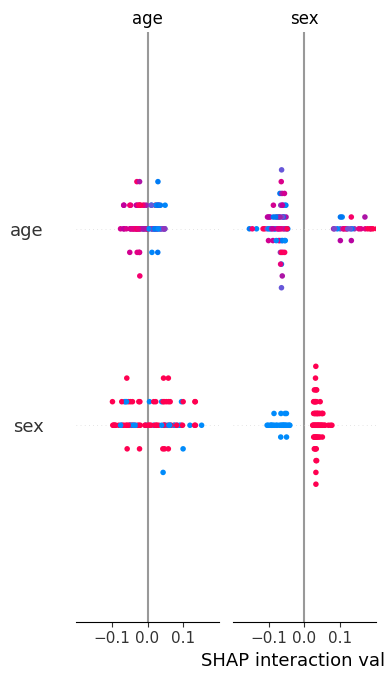

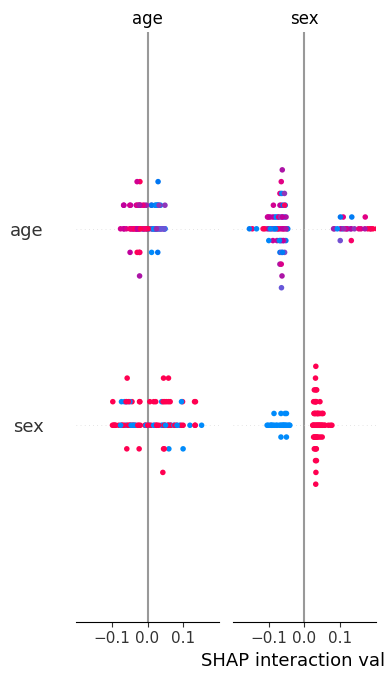

In [19]:
# --- Pick correct shap values for binary classification ---
# For RandomForestClassifier with 2 classes, shap_values is a list of 2 arrays:
# shap_values[0] → contribution toward class 0
# shap_values[1] → contribution toward class 1
if isinstance(shap_values, list):
    sv = shap_values[1]  # class = 1 (Heart Disease)
    expected_value = explainer.expected_value[1]
else:
    sv = shap_values
    expected_value = explainer.expected_value

# --- 1️⃣ GLOBAL EXPLANATIONS ---

# (a) Bar summary — shows mean(|SHAP value|) = global feature importance
shap.summary_plot(sv, x_test, plot_type="bar")

# (b) Beeswarm plot — shows how each feature’s value affects the prediction
shap.summary_plot(sv, x_test)



In [20]:
# --- 2️⃣ LOCAL EXPLANATIONS ---

# Example: explain a single patient (change the index as needed)

# (a) Force plot for one patient

sample_index = 5  # patient index /sample you want to explain
class_index = 0   # output/class you want to explain

shap.plots.force(
    expected_value[class_index],    # pick the expected value for this class
    sv[sample_index, :, class_index],  # SHAP values for this sample and class
    x_test.iloc[sample_index, :]       # feature values for this sample
)


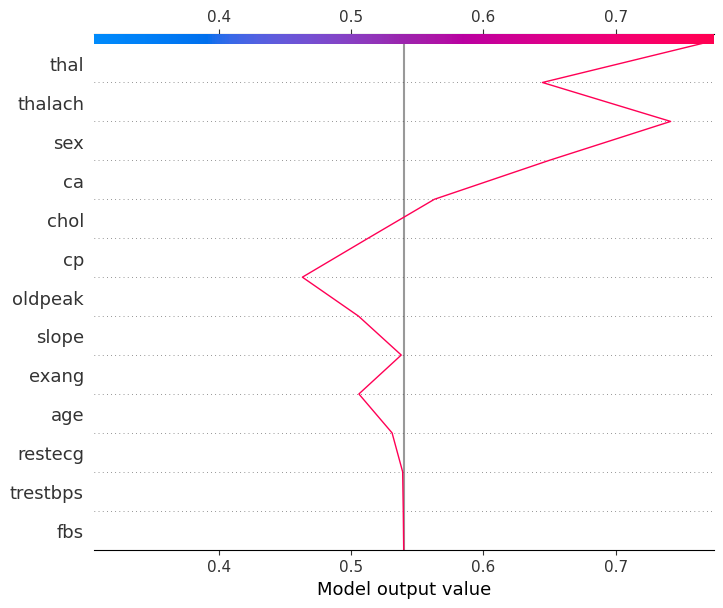

In [30]:
# (b) Decision plot — shows how features contribute step by step

class_index = 0  # pick the output/class you want

shap.decision_plot(
    expected_value[class_index],          # scalar
    sv[sample_index, :, class_index],     # shape (13,)
    x_test.columns                        # 13 feature names
)


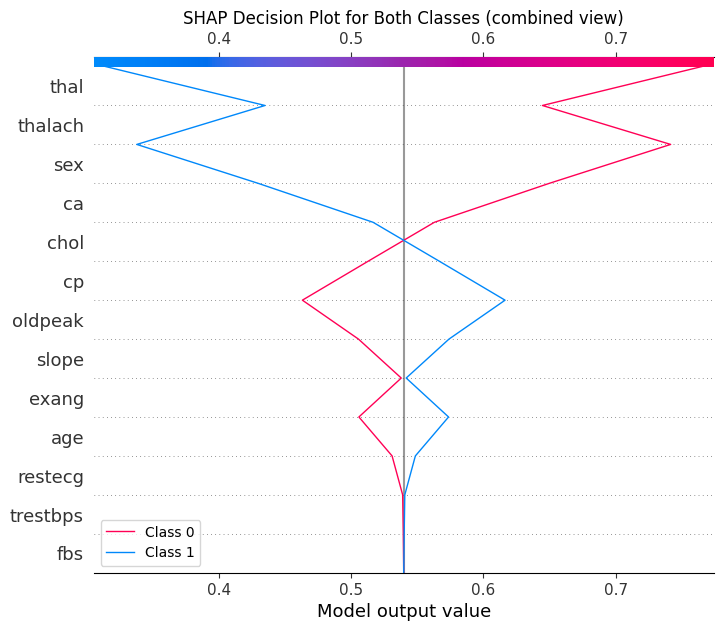

In [29]:
shap.decision_plot(
    base_value=expected_value[0],  # choose one as reference baseline
    shap_values=np.vstack([sv[sample_index, :, 0], sv[sample_index, :, 1]]),  # shape (2, 13)
    feature_names=x_test.columns.tolist(),
    legend_labels=["Class 0", "Class 1"],
    title="SHAP Decision Plot for Both Classes (combined view)"
)



In [22]:
# --- 3️⃣ INTERACTIVE MULTI-SAMPLE PLOT (optional) ---
# Visualize several patients together
start_index = 0
end_index = 5
class_index = 0

shap.plots.force(
    expected_value[class_index],                   # scalar for this class
    sv[start_index:end_index, :, class_index],     # shape (5, 13)
    x_test.iloc[start_index:end_index]            # 5 samples
)
